# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save it as raw data.
* Inspect the data and save it under outputs/datasets/collection

## Inputs

*   Kaggle JSON file - the authentication token.

## Outputs

* Generate Dataset: 
    * outputs/datasets/collection/house_price_record.csv
    * outputs/datasets/collection/inherited_houses.csv

    codeinstitute/housing-prices-data

## Additional Comments

* In the workplace, **projects are not done using Kaggle data**, but instead, the data comes from multiple data sources that may be hosted internally (like in a data warehouse) or outside your company. For this project learning context, we are fetching the data from Kaggle.

* Data is avaailable in public records. Noted that in the workplace **data would not been pushed to a public repository** for security reasons.


---

# Install python packages in the notebooks

In [1]:
%pip install -r /workspace/milestone-project-5/requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-5'

# Fetch data from Kaggle

Install Kaggle package to fetch data

In [ ]:
%pip install kaggle==1.5.12

A **JSON file (authentication token)** from Kaggle is downloaded and added the main directory. This is needed to authenticate Kaggle to download data in this session.

The following steps were followed:

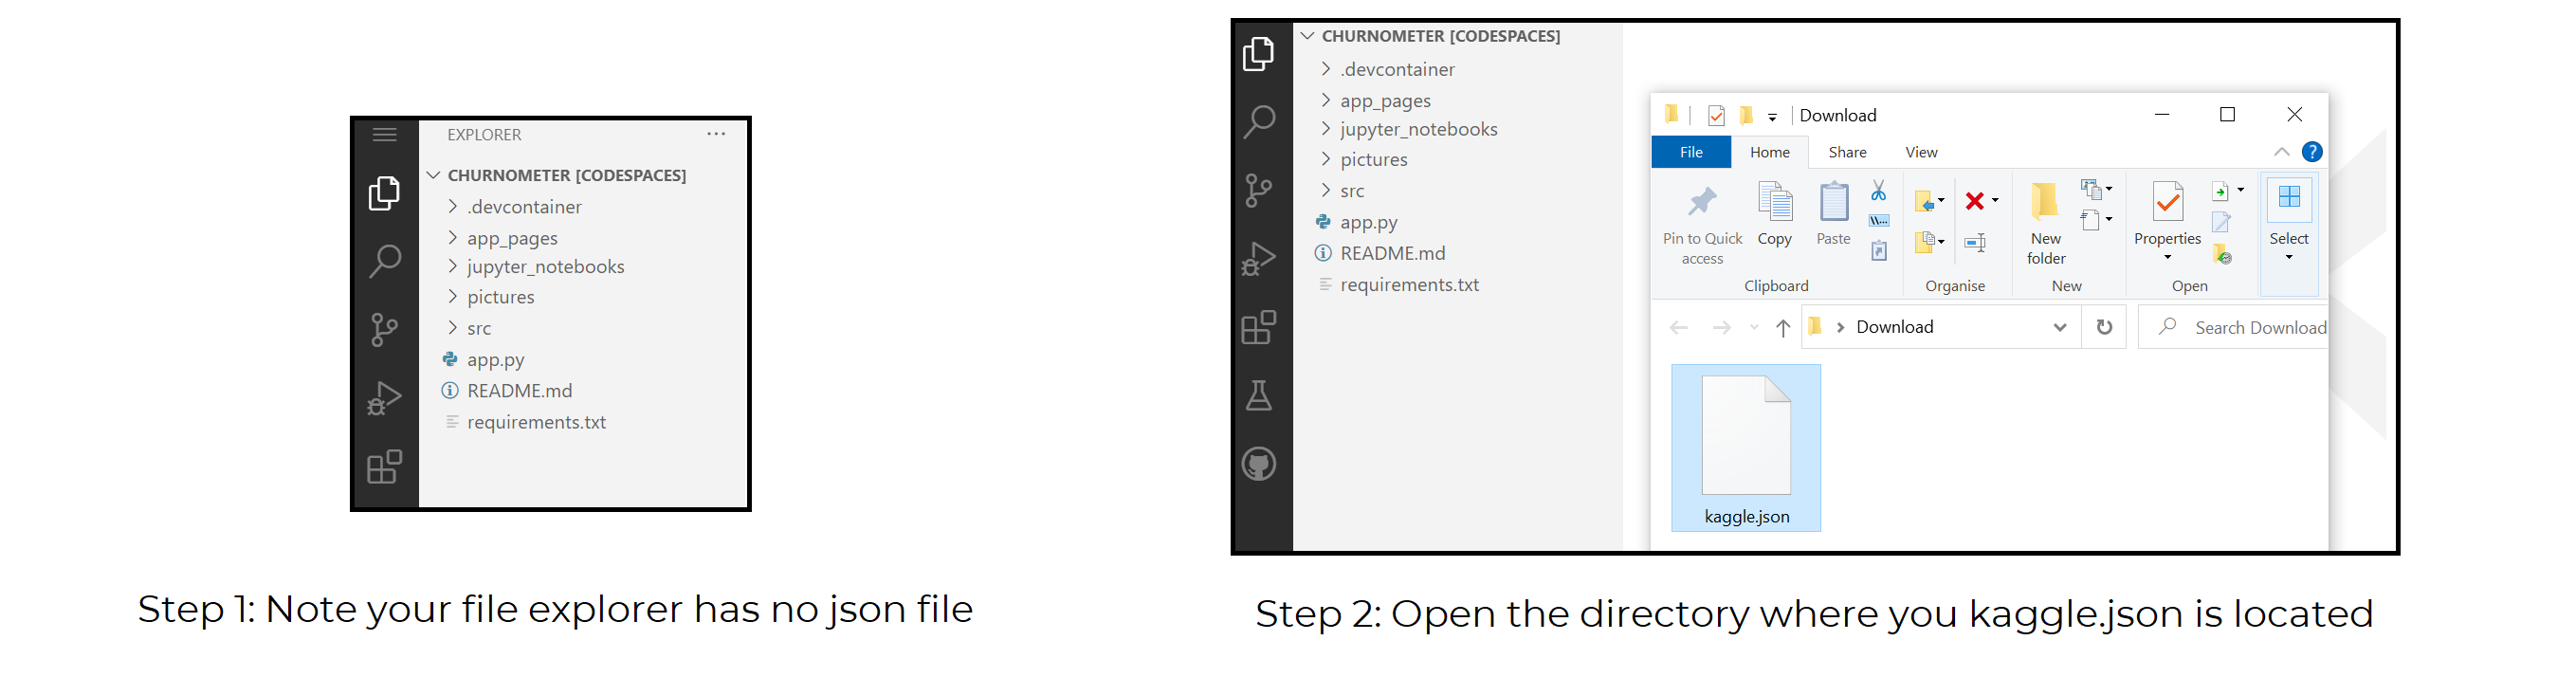

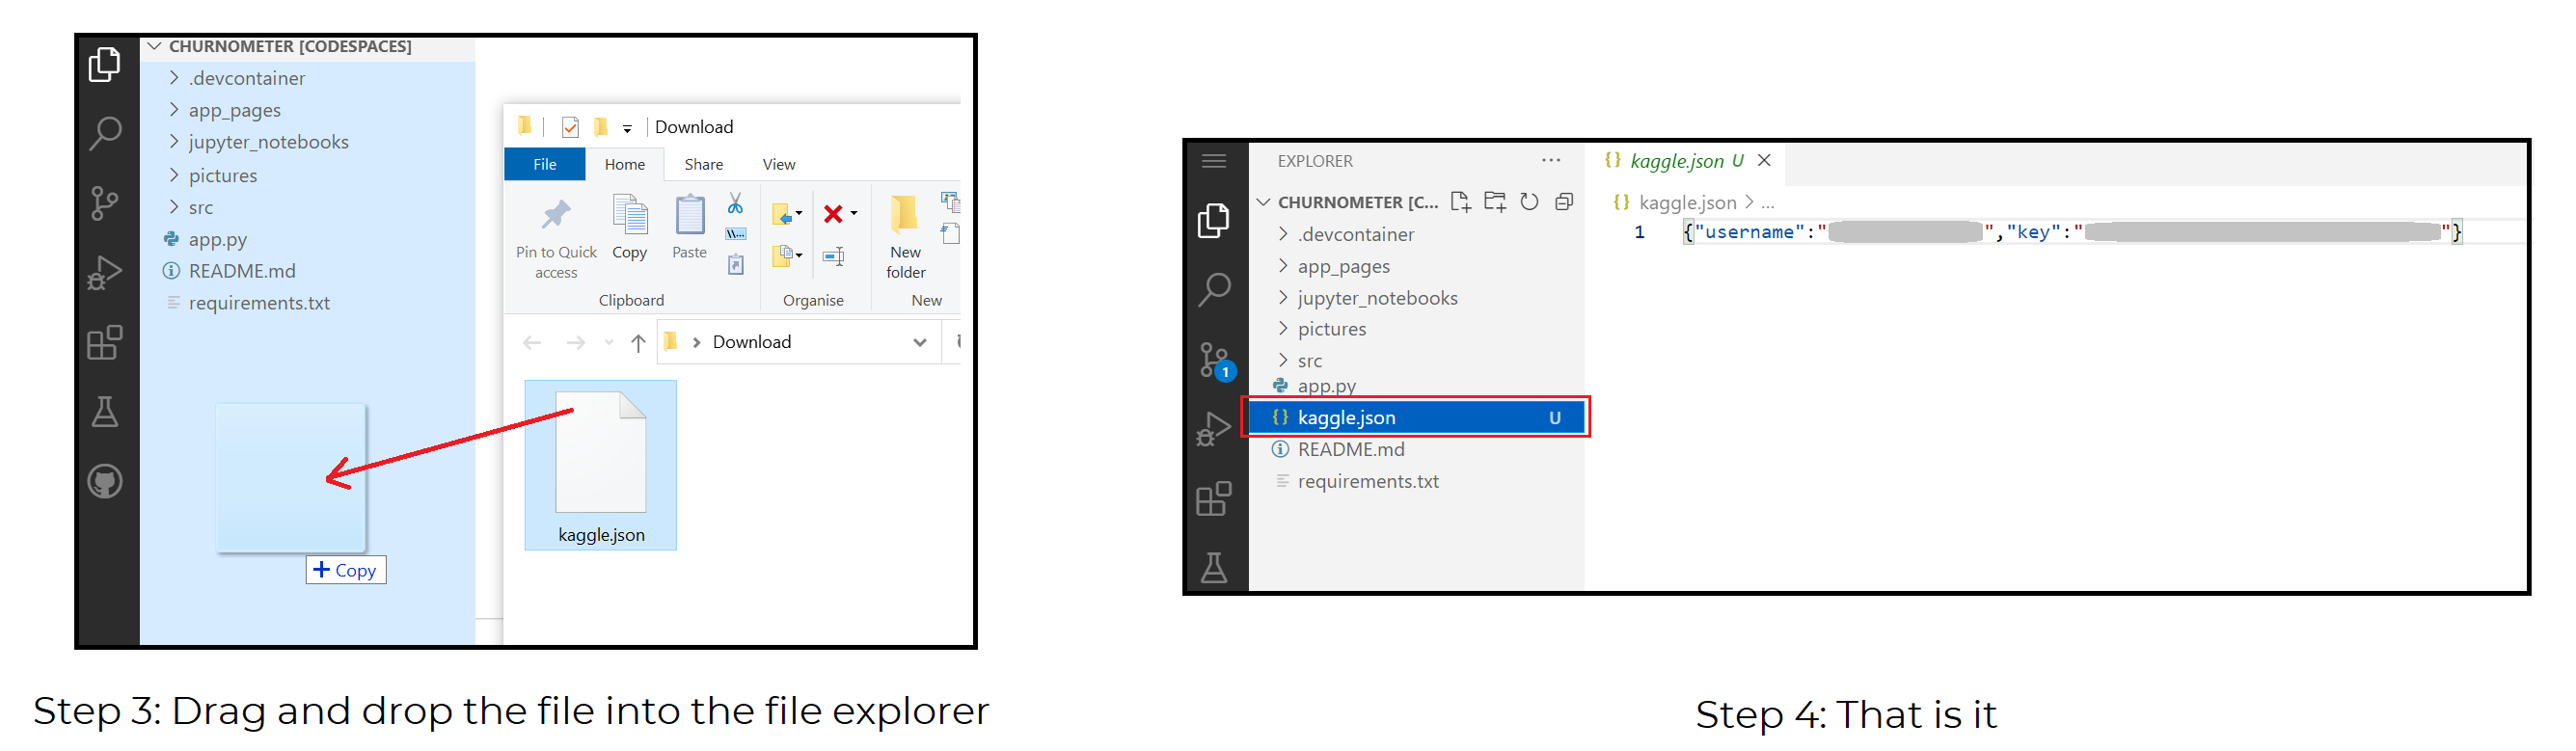

After adding kaggle.json file the cell below can be run.

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

We are using the following [Kaggle URL](https://www.kaggle.com/datasets/codeinstitute/housing-prices-data) to obtain the housing dataset.

Get the dataset path from the Kaggle url
* When you are viewing the dataset at Kaggle, check what is after https://www.kaggle.com/datasets/ .

Define the Kaggle dataset, and destination folder and download it.

In [6]:
KaggleDatasetPath = "codeinstitute/housing-prices-data"
DestinationFolder = "inputs/datasets/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

  0%|                                               | 0.00/49.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 49.6k/49.6k [00:00<00:00, 2.04MB/s]


Unzip the downloaded file, delete the zip file and delete the kaggle.json file

In [7]:
! unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip \
  && rm kaggle.json

Archive:  inputs/datasets/raw/housing-prices-data.zip
  inflating: inputs/datasets/raw/house-metadata.txt  
  inflating: inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv  
  inflating: inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/inherited_houses.csv  


---

# Load and Inspect Kaggle data

In [8]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   
3        540            NaN         642          Unf  ...         60.0   
4        490            0.0         836          RFn  ...         84.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   
3         0.0          35            5            7          756         NaN   
4       350.0          84            5            8         1145         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  
3       1915          1970     140000  
4       2000          2000     250000  

[5 rows x 24 columns]

DataFrame summary

- This function is applied to reveiw all the data types that are present in the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Ideally for correlation and machine learning - objects should be converted to integers.
However, given there are not binary categories, i.e. "yes" or "no". The data has not been modified and we can use exploratory functions to encode the categorical data later during correlation studies.

In [15]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'None'], dtype=object)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [16]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/house_prices_records.csv",index=False)
